# Курсовая работа
Струц Родион Олегович

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import csv
import random
from datetime import datetime, timedelta

In [19]:
def generate_date():
    st_dt = datetime(2010, 1, 1)
    e_dt = datetime(2024, 5, 20)
    rnd_dt = st_dt + timedelta(days=random.randint(0, (e_dt - st_dt).days))
    return rnd_dt.strftime('%Y-%m-%d')

products = [
    ('Виски An Cnoc', 'Крепкий алкоголь', random.randint(1, 200), random.randint(8500, 14000)),
    ('Виски BalBlair', 'Крепкий алкоголь', random.randint(1, 65), random.randint(40000, 82000)),
    ('Виски Cattos', 'Крепкий алкоголь', random.randint(1, 100), random.randint(17000, 75000)),
    ('Виски Jack Daniels', 'Крепкий алкоголь', random.randint(1, 2000), random.randint(1200, 2100)),
    ('Вино Prima Alta Pinot Grigio', 'Вино', random.randint(1, 1500), random.randint(2500, 4200)),
    ('Вино Pfeferrer', 'Вино', random.randint(1, 750), random.randint(5400, 8700)),
    ('Вино Matsu, El Recio', 'Вино', random.randint(1, 1000), random.randint(4500, 19000)),
    ('Пиво Reds', 'Пиво', random.randint(1, 850), random.randint(200, 1500)),
    ('Пиво Kronenbourg 1664 Blanc', 'Пиво', random.randint(1, 800), random.randint(600, 2000)),
    ('Пиво Korona Extra', 'Пиво', random.randint(1, 1700), random.randint(300, 1200)),
    ('Сидр Bon Season', 'Сидр', random.randint(1, 1900), random.randint(500, 1800)),
    ('Сидр Strongbow', 'Сидр', random.randint(1, 1000), random.randint(650, 1250)),
    ('Сидр Мистер Кот', 'Сидр', random.randint(1, 500), random.randint(3500, 8000)),
    ('Лимончелло', 'Ликеры', random.randint(1, 600), random.randint(1800, 3000)),
    ('Егермейстер', 'Ликеры', random.randint(1, 250), random.randint(6000, 9500))
]
with open('band.csv', 'w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file, delimiter='|')

    # Записываем заголовок
    writer.writerow(['Номер заказа', 'Дата заказа', 'Название товара', 'Категория товара', 'Количество продаж', 'Цена за единицу', 'Общая стоимость'])

    all_cash = 0
    
    for i in range(1, 20):
        rnd_dt = generate_date()

        rnd_prdct = random.choice(products)
        prdct_n = rnd_prdct[0]
        category = rnd_prdct[1]
        amount = rnd_prdct[2]
        pr_prdct = rnd_prdct[3]

        all_cash += amount*pr_prdct

        writer.writerow([random.randint(1, 100000000), rnd_dt, prdct_n, category, amount, pr_prdct, amount*pr_prdct])

Лимончелло был(а) продан(а) 535 раз(а) и занимает(ют) 4.828858636393116 % от общей выручки

Егермейстер был(а) продан(а) 203 раз(а) и занимает(ют) 7.279920325422666 % от общей выручки

Виски Cattos был(а) продан(а) 55 раз(а) и занимает(ют) 8.759653483331657 % от общей выручки

Егермейстер был(а) продан(а) 203 раз(а) и занимает(ют) 7.279920325422666 % от общей выручки

Сидр Strongbow был(а) продан(а) 264 раз(а) и занимает(ют) 1.080673475260243 % от общей выручки

Вино Pfeferrer был(а) продан(а) 730 раз(а) и занимает(ют) 19.610054412192003 % от общей выручки

Сидр Bon Season был(а) продан(а) 1800 раз(а) и занимает(ют) 8.962687545056353 % от общей выручки

Виски An Cnoc был(а) продан(а) 112 раз(а) и занимает(ют) 4.681700890829018 % от общей выручки

Сидр Strongbow был(а) продан(а) 264 раз(а) и занимает(ют) 1.080673475260243 % от общей выручки

Виски Jack Daniels был(а) продан(а) 316 раз(а) и занимает(ют) 1.578382035102923 % от общей выручки

Пиво Reds был(а) продан(а) 719 раз(а) и занимае

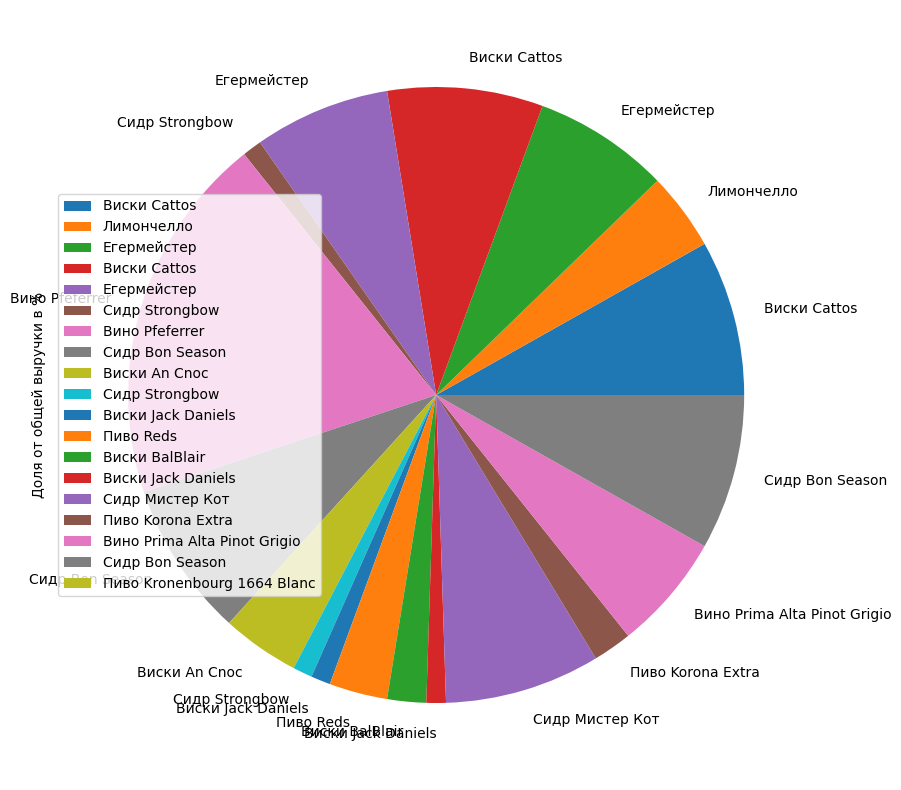

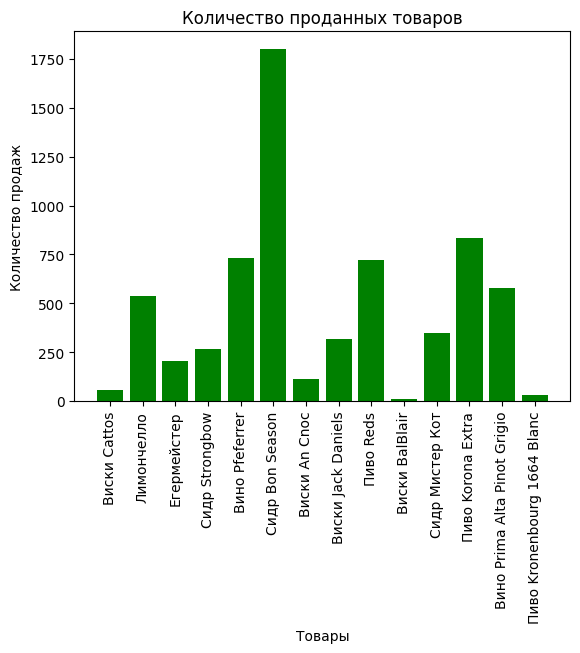

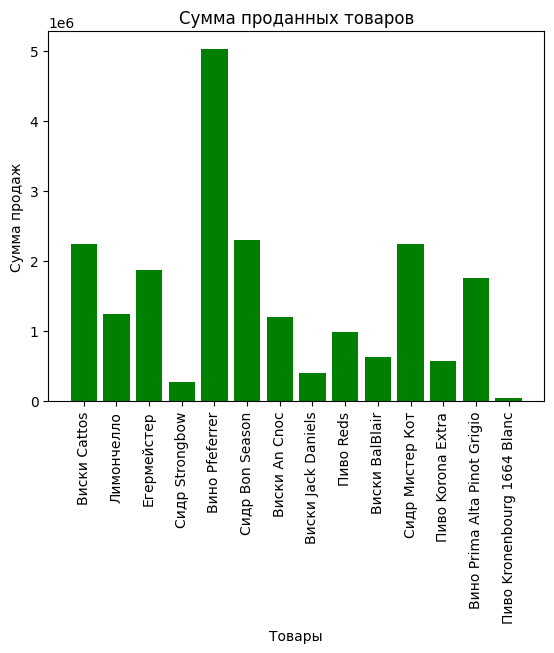

In [20]:


products_num = defaultdict(int)

spChar = ['`','~','!','@','#','$','^','&','*','(',')','_','+','=','{','[','}','}','|',':',';','<',',','>','.','?','/', '\\']
spChar2 = ['"', "'", '%', '-']

error = True

with open("band.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")
    next(file_reader)
    massiv = list(file_reader)

    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num

    summa = 0
    
    for row in massiv:
        if row != massiv[0]:
            summa += int(row[6])


            if (len(row) != 7):
                print("Файл неправильно отформатирован")
                print(row)
                error = False
                break

            try:
                int(row[0])
            except:
                print("Номер заказа не совпадает с форматом шаблона")
                print(row[0])
                error = False
                break

            try:
                str(row[1])
            except:
                print("Дата заказа неверна")
                print(row[1])
                error = False
                break

            if any((char in spChar) for char in row[2]):
                print("Название товара неверна")
                print(row[2])
                error = False
                break

            if any((char in spChar) for char in row[3]) or any((char in spChar2) for char in row[3]) or any((char.isdigit()) for char in row[3]):
                print("Категория товара неверна")
                print(row[3])
                error = False
                break

            try:
                int(row[4])
            except:
                print("Количество продаж неверно")
                print(row[4])
                error = False
                break

            try:
                float(row[5])
            except:
                print("Цена единицы товара неверна")
                print(row[5])
                error = False
                break

            try:
                float(row[6])
            except:
                print("Общая стоимость товаров неверна")
                print(row[6])
                error = False
                break
            if ((int(row[4]) * float(row[5])) != float(row[6])):
                print("Общая стоимость товара неверна")
                print(int(row[4]) * float(row[5]))
                print(float(row[6]))
                print(row)
                error = False
                break

with open("band.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = "|")
    next(file_reader)

    for row in file_reader:
        num = int(row[4])
        name = row[2]

        products_num[name] += num

def quicksort(array):
    num = len(array)
    if num <= 1:
        return array
    pivot = array[num // 2][0]
    left = []
    middle = []
    right = []
    for info in array:
        if info[0] < pivot:
            left.append(info)
        elif info[0] > pivot:
            right.append(info)
        else:
            middle.append(info)
    return quicksort(left) + middle + quicksort(right)

    hashTable = [None] * (len(massiv) - 1)
    for i in range(len(hashTable)):
         hashTable[i] = []

    def hash(jey):
        jeyjey = 0
        for i in jey:
            jeyjey += ord(i)
        return int(jeyjey) % (len(massiv) - 1)

    def insert(jey, value):
        i = hash(jey)
        hashTable[i].append(value)

    for row in massiv:
        if (row != massiv[0]):
            insert(row[2], row[2])

    for i in hashTable:
        print(i)

def calculation(r_file):
    max_tovar, obh_stoimost = 0,0
    max_viruchca = ""

    max_sales = ""
    count_row = 0

    for row in r_file:
        if count_row != 0:
            if max_tovar < int(row[4]):
                max_tovar = int(row[4])
                max_sales = row[2]
            if obh_stoimost < int(row[6]):
                obh_stoimost = int(row[6])
                max_viruchca = row[2]
        count_row += 1

    return max_sales, max_viruchca

try:

    data = pd.read_csv('band.csv', sep='|')
    with open("band.csv", encoding='utf-8') as r_file:
        file_reader = csv.reader(r_file, delimiter = "|")

        for row in massiv:
            if row != massiv[0]:
                print(f'{row[2]} был(а) продан(а) {row[4]} раз(а) и занимает(ют) {(int(row[6])*100)/summa} % от общей выручки')
                print()

        print(f'Общая выручка магазина: {summa}')

        max_sales, max_viruchca = calculation(file_reader)
        print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
        print(f'Товар, который принес наибольшую выручку: {max_viruchca}')

        massiv = list(file_reader)

    products_num_list = [(value, jey) for jey, value in products_num.items()]

    products_num_list = quicksort(products_num_list)

    print("Наиболее часто покупаемый продукт:", products_num_list[-1])

except:
    print('В файле содержатся ошибки')

data['Доля от общей выручки в %'] = data['Общая стоимость'] / (summa / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2).astype(int)
data.index = data['Название товара']

data[['Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10))
plt.show()

df = pd.DataFrame(data)

X = list(df.iloc[:, 2])
Y = list(df.iloc[:, 4])

plt.bar(X, Y, color='g')
plt.title("Количество проданных товаров")
plt.xlabel("Товары")
plt.ylabel("Количество продаж")
plt.xticks(rotation='vertical')

plt.show()

df = pd.DataFrame(data)

X = list(df.iloc[:, 2])
Y = list(df.iloc[:, 6])

plt.bar(X, Y, color='g')
plt.title("Сумма проданных товаров")
plt.xlabel("Товары")
plt.ylabel("Сумма продаж")
plt.xticks(rotation='vertical')

plt.show()
